# Homework 3: Neural Networks


This assignment is due on Moodle by **11:59pm on Friday October 16**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).


**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- In this homework, we will use [PyTorch](https://pytorch.org/) and [PyTorch Lightning](https://pytorch-lightning.readthedocs.io/en/latest/introduction_guide.html) to implement a classifier. First upgrade your `pip` package manager to the latest version (Version >19.0). Then install the current stable release for [PyTorch](https://pytorch.org/get-started/locally/) (version: 1.6.0) as the backend for PyTorch Lightning. Then install [PyTorch Lighntning](https://pytorch-lightning.readthedocs.io/en/latest/introduction_guide.html) (version: 0.9.0).

```
pip install --upgrade pip

pip install torch

pip install pytorch-lightning

```

It is **highly recommended** you install the CPU-only version of PyTorch if your'e unfamiliar with the process of installing CUDA libraries for these packages. If you choose to install a GPU version, ensure you're code runs without GPU support.

**Acknowledgment** : Chris Ketelsen

**Please put your name and cuidentity username.**

**Name**: Muntaha Pasha

**Identity Key**: mupa0444

In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
import random
%matplotlib inline

# Test PyTorch installation
import torch 
import pytorch_lightning as pl
pl.seed_everything(1234)

C:\Users\munta\anaconda3\envs\py37\lib\site-packages\pytorch_lightning\utilities\distributed.py:37: UserWarning: Unsupported `ReduceOp` for distributed computing.
  warnings.warn(*args, **kwargs)


1234

[20 points] Problem 1 - Single-Layer and Multilayer Perceptron Learning
---

### Part 1 [10 points] 
Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize the *indicator* activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights, biases, and the *indicator* activation functions if applicable:

- $\; \texttt{NOT } x_1$

- $\; x_1 \texttt{ NAND } x_2$

- $\; x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)

**(SOLUTION):**

- $\; \texttt{NOT } x_1$

This $\textbf{can}$ be learned from a Single-Layer Perceptron if we set our weight $w_1$ to the value of $-1$, and we set our bias to the value of $1$. Then, when $x_1$ is equivalent to $1$, our output will be $0$. And when $x_1$ is $0$, the output value will be $1$. So yes, Single-Layer Perceptron can learn this. $\checkmark$

An $\textbf{Indicator Function}$ to use here is, given input $x$, and output $y$...

If $(w \cdot x) + b \leq 0$, then $y = 0$. 

Else, if  $(w \cdot x) + b \gt 0$,  then $y = 1$ 

- $\; x_1 \texttt{ NAND } x_2$

This $\textbf{can}$ be learned from a Single-Layer Perceptron if we set our weights $w_1$ and $w_2$ to the value of $-1$, and we set our bias to the value of $1$. If one of the inputs is $1$, or both of them are $1$, then the output we get will be $0$. Similarly, if both inputs are set to the value of $0$, then the output will be $1$. So yes, Single-Layer Perceptron can learn this. $\checkmark$

An $\textbf{Indicator Function}$ to use here is, given inputs $x_1, x_2$, and output $y$... 

If $(w_1 \cdot x_1) + (w_2 \cdot x_2) + b \leq 0$, then $y = 0$ 

Else, if  $(w_1 \cdot x_1) + (w_2 \cdot x_2) + b \gt 0, y = 1$ 

- $\; x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)

This $\textbf{can't}$ be learned from a Single-Layer Perceptron, because you can see clearly that the cases we have aren't linearly seperable. Looking at the visual representation of our tuple $(x_1, x_2)$, we get these tuples for class $0$: $(0, 1), (1, 0)$. For class $1$: $(1, 1), (0, 0)$. So these aren't linearly seperable and thus Single-Layer Perceptron won't work on them. This requires us to use 2 layers. $\checkmark$

### Part 2 [10 points] 

Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with *indicator* activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Make a truth table of $x_1$, $x_2$, and $x_1 \texttt{ XNOR } x_2$, describe your perceptron's architecture, and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.

**SOURCES USED:**

1 - (Constructing an XNOR) https://whatis.techtarget.com/definition/logic-gate-AND-OR-XOR-NOT-NAND-NOR-and-XNOR

2 - (Understanding XNOR Truth Table) https://mathworld.wolfram.com/XNOR.html

**(SOLUTION):**

- Architecture of XNOR

$\textbf{XNOR is NOT linearly seperable, so we need to do 2 layers for this.}$

XNOR is formed from the OR operator on an AND and NOR function. We know the weights, bias, and indicator functions for AND, and NOR.

For $\textbf{AND}$, we have the following weights, $w_1 = 1, w_2 = 1$, and $b_1 = -1.5$ is our bias. The $\textbf{Indicator Function}$ we can use is...

If $(w_1 \cdot x_1) + (w_2 \cdot x_2) + b_1 \leq 0$, then $y = 0$.

Else, if $(w_1 \cdot x_1) + (w_2 \cdot x_2) + b_1 \gt 0$, then $y = 1$.

For $\textbf{NOR}$, we have the following weights, $w_3 = -1, w_4 = -1$, and $b_4 = 0.5$ is our bias. The $\textbf{Indicator Function}$ we can use is...

If $(w_3 \cdot x_1) + (w_4 \cdot x_2) + b_2 \leq 0$, then $y = 0$.

Else, if $(w_3 \cdot x_1) + (w_4 \cdot x_2) + b_2 \gt 0$, then $y = 1$

Now, we can take the outputs we get for $\textbf{NOR}$, and $\textbf{AND}$, and we can give them as the inputs to our $\textbf{OR}$ operator. 

For $\textbf{OR}$, we have the following weights, $w_5 = 1, w_6 = 1$, and $b_3 = -0.5$ is our bias. The $\textbf{Indicator Function}$ we can use is...

If $(w_5 \cdot x_1) + (w_6 \cdot x_2) + b_3 \leq 0$, then $y = 0$.

Else, if $(w_5 \cdot x_1) + (w_6 \cdot x_2) + b_3 \gt 0$, then $y = 1$.

- Making Truth Tables

First, let's look at the Two Layer Perceptron we need to achieve an $\textbf{XNOR}$ operator successfully.

<table>
  <thead>
    <tr>
      <th>$x_1$</th>
      <th>$x_2$</th>
        <th>$x_1$ AND $x_2$</th>
        <th>$x_1$ NOR $x_2$</th>
        <th>$x_1$ OR $x_2$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>$0$</td>
      <td>$0$</td>
      <td>$\hspace{7mm}0$</td>  
      <td>$\hspace{7mm}1$</td>
      <td>$\hspace{6mm}1$</td>
    </tr>
    <tr>
      <td>$0$</td>
      <td>$1$</td>
      <td>$\hspace{7mm}0$</td>  
      <td>$\hspace{7mm}0$</td>
      <td>$\hspace{6mm}0$</td>
    </tr>
    <tr>
      <td>$1$</td>
      <td>$0$</td>
      <td>$\hspace{7mm}0$</td>  
      <td>$\hspace{7mm}0$</td>
      <td>$\hspace{6mm}0$</td>
    </tr>
    <tr>
      <td>$1$</td>
      <td>$1$</td>
      <td>$\hspace{7mm}1$</td>  
      <td>$\hspace{7mm}0$</td>
      <td>$\hspace{6mm}1$</td>
    </tr>
  </tbody>
</table>

Now, looking at our Truth Table, we first perform the $\textbf{AND}$ operator on $x_1, x_2$. Then, as we discussed, we perform a $\textbf{NOR}$ operator on $x_1, x_2$. See at the end we are left with the values $[1, 0, 0, 1]$, respectfully after peforming the $\textbf{OR}$ operator.

To compare our result, let's look at a Truth Table for a $\textbf{XNOR}$.

<table>
  <thead>
    <tr>
      <th>$x_1$</th>
      <th>$x_2$</th>
      <th>$x_1$ XNOR $x_2$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>$0$</td>
      <td>$0$</td>
      <td>$\hspace{7mm}1$</td>  
    </tr>
    <tr>
      <td>$0$</td>
      <td>$1$</td>
      <td>$\hspace{7mm}0$</td>  
    </tr>
    <tr>
      <td>$1$</td>
      <td>$0$</td>
      <td>$\hspace{7mm}0$</td>  
    </tr>
    <tr>
      <td>$1$</td>
      <td>$1$</td>
      <td>$\hspace{7mm}1$</td>  
    </tr>
</table>

Sure enough, this checks out. An $\textbf{XNOR}$ returns us the values $[1, 0, 0, 1]$ which is the SAME result we got from doing an $\textbf{OR}$ on and $\textbf{AND}$ and $\textbf{NOR}$ from earlier! $\checkmark$

- The Matrices for Weights ($W_1, W_2$), and Vectors for our Bias Values ($b_1, b_2$)

$W_1 = \begin{bmatrix} 1 & -1 \\ 1 & -1 \end{bmatrix}$, $W_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

$b_1 = \begin{bmatrix} -1.5 \\ 0.5 \end{bmatrix}$, $b_2 = \begin{bmatrix} -0.5 \end{bmatrix}$

In [2]:
# YOUR CODE HERE
#raise NotImplementedError()

#--------------------SET UP--------------------#

#Split Weight Matrices into 2 seperate cases for W1 and W2.
weight_matrices = [[[1, 1], [-1,-1]], [[1,1]]]
#Bias Vectors also split into 2 seperate cases for b1 and b2.
bias_vectors = [[-1.5, 0.5], [-0.5]]
#Initialize our test cases, all sample inputs of x1 and x2.
input_vals = [[0,0], [0,1], [1,0], [1,1]]

#--------------FUNCTION DEFINITIONS-------------#

def activation_func(weight_matrices, bias_vectors, input_vals):
    #Take the activation value and initialize it to the length of the Bias Vector.
    lenBias = len(bias_vectors)
    activation_val = lenBias * [1]
    #For each value in weight matrix...
    for i in range(len(weight_matrices)):
        #Do the dot product of our weight and our input value (This is that w * x step.)
        dotVal = np.dot(input_vals, weight_matrices[i])
        #Indicator Function check.
        if(dotVal + bias_vectors[i] <= 0):
            activation_val[i] = 0
        else:
            activation_val[i] = 1
    return activation_val

def compute_xnor(weight_matrices, bias_vectors, input_vals):
    #Compute our yhat value.
    yVal = []
    #For each of our x's
    for xs in input_vals:
        res = xs
        for i in range(len(bias_vectors)):
            #Use the activation function
            res = activation_func(weight_matrices[i], bias_vectors[i], res)
        yVal.append(res)  
    return yVal

#----------------TESTING FUNCTION---------------#

def print_results(weight_matrices, bias_vectors, input_vals):
    xnorComputation = compute_xnor(weight_matrices, bias_vectors, input_vals)
    inputLen = len(input_vals)
    for j in range(inputLen):
        #Print out the Input Value and Output Value side by side.
        print("Input Values", input_vals[j], "Output Value", xnorComputation[j])

print_results(weight_matrices, bias_vectors, input_vals)

Input Values [0, 0] Output Value [1]
Input Values [0, 1] Output Value [0]
Input Values [1, 0] Output Value [0]
Input Values [1, 1] Output Value [1]


Sure enough, I got the right outputs that are expected from an $\textbf{XNOR}$ operation. I got the corresponding correct values for the Truth Table, $[1, 0, 0, 1]$. $\checkmark$

[25 points] Problem 2 - Back propagation
---

In this problem you will gain some intuition about why training deep neural networks can be very time consuming.  Consider training a chain-like neural network: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
\ell(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example. 

### Part 1 [5 points]
Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 

**SOURCES USED:**

1 - (Types of Activation Functions) https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/

**(SOLUTION):**

We use $\sigma$ as our Sigmoid Activation Function, and we know that out $a$ values are the Activations we need. We are given that $W^1, W^2, W^3$ are all intialized to $1$, and we know that our biases $b^1, b^2, b^3$ are all initialized to $-0.5$.

Now, we know our $\textbf{Input Layer}$ will be $a^1 = x$. So, $a^1 = 0.5$

Let's look at the $\textbf{Hidden Layer}$ now.

Starting with $z^2$, and $a^2$...

$z^2 = (W^1 \cdot x) + b^1 = (1 \cdot 0.5) - 0.5 = 0$

$a^2 = \sigma(z^2) = \sigma(0) = 0.5$

Now, onto $z^3$ and $a^3$...

$z^3 = (W^2 \cdot a^2) + b^2 = (1 \cdot 0.5) - 0.5 = 0$

$a^3 = \sigma(z^3) = \sigma(0) = 0.5$

Finally, we get to the $\textbf{Output Layer}$.

$z^4 = (W^3 \cdot a^3) + b^3 = (1 \cdot 0.5) - 0.5 = 0$

$a^4 = \sigma(z^4) = \sigma(0) = 0.5$

So, in conclusion...

$$\hat{y} = a^4 = 0.5 \checkmark$$

### Part 2 [5 points]:
Use Back-Propagation to compute the weight and bias derivatives $\partial \ell / \partial W^k$ and $\partial \ell / \partial b^k$ for $k=1, 2, 3$.  Show all work. 

**(SOLUTION):**

Let's start with our $\textbf{Output Layer}$, $L = 3$.

$\delta^{3} = (a^4 - y) \cdot \sigma'(z^3)$

$= (a^4 - y) \cdot (\sigma(z^3) \cdot (1 - \sigma(z^3))$

$= (0.5 - 0) \cdot (\sigma(0) \cdot (1 - \sigma(0))$

$= 0.5 \cdot (0.5 \cdot 0.5) = 0.125$

$\frac{\partial \ell}{\partial W^3} = \delta^{3} \cdot (a^3)^T$

$= 0.125 \cdot (0.5)^T = 0.0625$

$\frac{\partial \ell}{\partial b^3} = \delta^{3} = 0.125$

Now, let's look at the $\textbf{Hidden Layer}$, $L = 2$.

$\delta^{2} = (W^3)^{T} \cdot \delta^3 \cdot \sigma'(z^2)$

$= 1 \cdot 0.125 \cdot (\sigma(0) \cdot (1 - \sigma(0))$

$= 0.125 \cdot (0.5 \cdot 0.5) = 0.03125$

$\frac{\partial \ell}{\partial W^2} = \delta^2 \cdot a^2$

$= 0.03125 \cdot 0.5 = 0.015625$

$\frac{\partial \ell}{\partial b^2} = \delta^2 = 0.03125$

Finally, let's look at our $L = 1$.

$\delta^1 = (W^2)^{T} \cdot \delta^2 \cdot \sigma'(z^1)$

$= 1 \cdot 0.03125 \cdot (\sigma(0) \cdot (1 - \sigma(0))$

$= 0.03125 \cdot (0.5 \cdot 0.5) = 0.0078125$

$\frac{\partial \ell}{\partial W^1} = \delta^1 \cdot (a^1)$

$=  0.0078125 \cdot 0.5 = 0.003906$

$\frac{\partial \ell}{\partial b^1} = \delta^1 = 0.0078125 \checkmark$

### Part 3 [5 points]
Implement the following activation functions in NumPy:
* ReLU
* Sigmoid
* softmax
Please **do not use any other external libraries** for this such as sklearn.

**SOURCES USED:**

1 - (Understanding ReLU, Sigmoid, SoftMax) https://medium.com/@cmukesh8688/activation-functions-sigmoid-tanh-relu-leaky-relu-softmax-50d3778dcea5

In [3]:
def relu(x):
    # YOUR CODE HERE
    #raise NotImplementedError()
    if(x > 0.0):
        return x
    else:
        return 0.0

def sigmoid(x):
    # YOUR CODE HERE
    #raise NotImplementedError()
    sigmVal = (1.0 / (1.0 + np.exp(-x)))
    return sigmVal

def softmax(x):
    # YOUR CODE HERE
    #raise NotImplementedError()
    expVal = np.exp(x)
    summation = np.sum(np.exp(x))
    res = expVal / summation
    return res

In [4]:
# random tests for checking your impementation.
from tests import tests
tests.run_test_suite('prob 2.3', (relu, sigmoid, softmax))

TestRelu (tests.tests.TestActiv) ... ok
TestSigmoid (tests.tests.TestActiv) ... ok
TestSoftmax (tests.tests.TestActiv) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.009s

OK


### Part 4 [5 points] 
Implement the following Loss functions in NumPy:
* mean squared error
* mean absolute error
* hinge

Please **do not use any other external libraries** for this such as sklearn.

**SOURCES USED:**

1 - (Understanding MSE) https://www.geeksforgeeks.org/python-mean-squared-error/

2 - (Understanding MAE) https://medium.com/@ewuramaminka/mean-absolute-error-mae-sample-calculation-6eed6743838a

3 - (Loss Functions like Hinge) https://medium.com/analytics-vidhya/understanding-loss-functions-hinge-loss-a0ff112b40a1

In [5]:
def mean_squared_error(yhat, y):
    # YOUR CODE HERE
    #raise NotImplementedError()
    sub = np.subtract(y, yhat)
    square = np.square(sub).mean()
    return square
    
def mean_absolute_error(yhat, y):
    # YOUR CODE HERE
    #raise NotImplementedError()
    sub = np.subtract(y, yhat)
    absVal = abs(sub).mean()
    return absVal

def hinge(yhat, y):
    # YOUR CODE HERE
    #raise NotImplementedError()
    e = 0.0
    yShape = y.shape[0]
    for i in range(0, yShape):
        mult = y[i] * yhat[i]
        maxVal = max(0, (1 - mult))
        e = e + maxVal
    e = e / yShape
    return e

In [6]:
# random tests for checking your impementation.
from tests import tests
tests.run_test_suite('prob 2.4', (mean_squared_error, mean_absolute_error, hinge))

TestMSE (tests.tests.TestLoss) ... ok
TestMAE (tests.tests.TestLoss) ... ok
TestHinge (tests.tests.TestLoss) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


### Part 5 [5 points]
Explain the vanishing gradient problem. When would you observe this? Give an example.

**SOURCES USED:**

1 - (Understanding Vanishing Gradient) https://en.wikipedia.org/wiki/Vanishing_gradient_problem

2 - (Where these Problems Occur/Why) https://www.mygreatlearning.com/blog/the-vanishing-gradient-problem/

**(SOLUTION):**

- Explaining the Vanishing Gradient Problem

The Vanishing Gradient Problem is a problem that happens when you train a Neural Network using Back Propogation and Gradients. What happens is that models that use Gradients for instance Gradient Descent, or Stocahstic Gradient Descent, all of your Weights and Biases at any Layer are updated via the Derivative of a Loss Function w/ respect to all of your Biases and Weights at that layer and with Eta, your learning rate parameter. Now if this Derivative, (i.e Gradient), is a really small value then the updates you recieve for your Bias and Weights will be really small too. Now if those updates are extremely small, then it defeats the purpose because your model is only learning a VERY small amount. This is not exactly Optimal, we want our Model to be able to learn a lot, so with a small learning rate we aren't doing great in that aspect. To take a closer look at this issue, we can learn that it happens because the Gradient Updates for both Bias (denoted as $\frac{\partial C}{\partial b^l}$) and Weights (denoted as $\frac{\partial C}{\partial W^l}$) come from taking products of the derivatives which show up further on in our Network (This means that in the Layers where $L > 1$). What happens is that if our values are $< 1$, then the product we get from them will also be very small. the sooner a Layer shows up in our Network the more our Gradient Values for $W$ and $b$ will depend on them, and this dependenacy is what can cause them to become lesser and lesser significant. Our updates won't matter much anymore, and our Learning Rate is already a small value so the Update can further become smaller. $\checkmark$ 

- When can we Observe this?

We can observe this problem when our Network is built really deep, even perhaps if we used a Sigmoid as our Loss Function, or can also be observed when our Weights lie between $0$ and $1$ (Gaussian Values). $\checkmark$

[23 Points] Problem 3 - Build a feedforward neural network in NumPy
---

In this problem you will implement a class representing a general feed-forward neural network that utilizes the sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent.

The skeleton for the network class is below. Note that this class is almost identical to the one you worked with in the "hands-on neural network" in-class notebook, so you should look at there to remind yourself of the details. Scroll down to find more information about your tasks as well as unit tests. As with the previous problem, nothing in this problem should use any external libraries apart from numpy. 

**SOURCES USED:**

1 - (Understanding self.keep_prob) https://stackoverflow.com/questions/35545798/keep-prob-in-tensorflow-mnist-tutorial

2 - (Dropouts/self.keep_prob) https://www.programcreek.com/python/example/93662/tensorflow.python.ops.rnn_cell.DropoutWrapper

3 - (Back Propogation) https://stats.stackexchange.com/questions/219236/dropout-forward-prop-vs-back-prop-in-machine-learning-neural-network

4 - (More about Back Propogation) https://towardsdatascience.com/simplified-math-behind-dropout-in-deep-learning-6d50f3f47275

5 - (Zip in Python) https://www.geeksforgeeks.org/zip-in-python/

6 - (Randomization in Dropout) https://visualstudiomagazine.com/articles/2018/02/01/neural-network-dropout.aspx

In [7]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


class Network:
    def __init__(self, sizes, keep_prob=-1):
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]]
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        self.keep_prob = keep_prob
        self.acc_train_array = []
        self.acc_test_array = []

    def g(self, z):
        """
        activation function
        """
        return sigmoid(z)

    def g_prime(self, z):
        """
        derivative of activation function
        """
        return sigmoid_prime(z)

    def forward_prop(self, a):
        """
        memory aware forward propagation for testing
        only.  back_prop implements it's own forward_prop
        """
        # YOUR CODE HERE
        #raise NotImplementedError()
        for i in range(self.L - 1):
            #Get the weights and biases at index i
            weights = self.weights[i]
            biases = self.biases[i]
            #Use dot product with weights and a and add the bias
            zVal = np.dot(weights, a) + biases
            #Use activation function
            a = self.g(zVal)
        return a

    def grad_cost(self, a, y):
        """
        gradient of cost function
        Assumes C(a,y) = (a-y)^2/2
        """
        return (a - y)
    
    def log_train_progress(self, train, test, epoch):
        """ Logs training progres. 
        """
        acc_train = self.evaluate(train)
        self.acc_train_array.append(acc_train)
        if test is not None:
            acc_test = self.evaluate(test)
            self.acc_test_array.append(acc_test)
            print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                epoch+1, acc_train, acc_test))
        else:
            print("Epoch {:4d}: Train {:10.5f}".format(
                epoch+1, acc_train))
            

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)
        for epoch in range(epochs):
            perm = np.random.permutation(n_train)
            for kk in range(n_train):
                self.SGD_step(*train[perm[kk]], eta, lam)
            if verbose and epoch == 0 or (epoch + 1) % 20 == 0:
                self.log_train_progress(train, test, epoch)
    
    def SGD_step(self, x, y, eta, lam):
        """
        TODO: get gradients with x, y and do SGD on weights and biases

        Args:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.
                
        """
        # TODO: get gradients with xk, yk and do SGD on weights and biases
        # YOUR CODE HERE
        #raise NotImplementedError()
        #Adding this for EC Dropout Problem
        if(self.keep_prob != -1):
            #Use back prop dropout if probability not -1
            d_weights, d_bias = self.back_prop_dropout(x, y)
        #Use normal dropout Function
        else:
            d_weights, d_bias = self.back_prop(x, y)
        rangeVal = (self.L - 1)
        for i in range(rangeVal):
            #Update bias and weight
            self.biases[i] = self.biases[i] - eta * d_bias[i]
            lampart = (1 - lam*eta)
            self.weights[i] = self.weights[i] * lampart - eta * d_weights[i]

    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)

        # Back propagate deltas to compute derivatives
        # The following list gives hints on how to do it
        # calculating delta (Error) for the output layer
        # for the appropriate layers compute db_list[ell], dW_list[ell], delta

        # YOUR CODE HERE
        #raise NotImplementedError()
        #Initializing everything I need here
        selfL = self.L - 1
        aVal = a_list[selfL]
        zVal = z_list[selfL]
        p1 = (aVal - y)
        #Taking the sigmoid activation
        prime_func = self.g_prime(zVal)
        #Update Delta
        delta_value = p1 * prime_func
        range1 = (self.L - 2)
        #Want to change the range here make sure
        for i in range(range1, -1, -1):
            #Update Weight/Bias list with Delta and a
            dW_list[i] = np.outer(delta_value, a_list[i])
            db_list[i] = delta_value
            #Take transpose
            transposeWeights = self.weights[i].transpose()
            #Put z in activation sigmoid
            zValUpdated = self.g_prime(z_list[i])
            #Get delta
            delta_value = np.dot(transposeWeights, delta_value) * zValUpdated
        return (dW_list, db_list)
    
    def back_prop_dropout(self, x, y):
        """
        Back propagation with dropout on the hidden layers other than the output layer.
        
        Dropout layer can be thought of as a special linear layer between layers.
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match
        # TODO: implement dropout using self.keep_prob
        # YOUR CODE HERE
        #raise NotImplementedError()
        deltaValue = []
        zipped = zip(self.weights, self.biases)
        #Will iterate through weights and bias at an index
        for i, (weight, bias) in enumerate(zipped):
            #Take dot product of weight and a
            dotted = np.dot(weight, a)
            #Initialize z
            zValue = dotted + bias
            #Append z to the list of z's
            z_list.append(zValue)
            #Update a w/ the activation on z
            a = self.g(zValue)
            #Just a range value
            checker = len(self.weights) - 1
            if(i != checker):
                for i in range(len(a)):
                    #The most common form of neural network dropout randomly selects half of a neural network's 
                    #hidden nodes, at each training iteration, and programmatically drops them.
                    r = random.random()
                    #Check against self.keep_prob
                    if(r > self.keep_prob):
                        a[i] = 0
            #Append a based on this random choice 
            a_list.append(a)
        rangeVal = (self.L - 1)
        #Initialize a list of our delta values
        deltaValue = [np.zeros((n, 1)) for n in self.sizes]
        #Computer the cost
        p1 = self.grad_cost(a_list[rangeVal], y)
        #Compute sigmoid on z 
        pPrime = self.g_prime(z_list[rangeVal])
        deltaValue[rangeVal] = p1 * pPrime
        for i in range(rangeVal, 0, -1):
            db_list[i - 1] = deltaValue[i]
            #Take transpose
            a_transpose = a_list[i - 1].T
            dW_list[i - 1] = np.dot(deltaValue[i], a_transpose)
            #Take transpose
            w_transpose = self.weights[i - 1].T
            #Sigmoid Activation
            gPrimeVal = self.g_prime(z_list[i - 1])
            #Update delta
            deltaValue[i - 1] = np.dot(w_transpose, deltaValue[i]) * gPrimeVal
        return (dW_list, db_list)

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += yhat.argmax() == y.argmax()
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1, 14))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()

### Part 1 [15 points]
Implement `SGD_step`, `back_prop`, and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [8]:
from tests import tests
tests.run_test_suite('prob 3', Network)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.433s

OK


### Part 2 [8 points]

Run the above Network on MNIST Dataset and report the following (feel free to experiment with different learning rates).

* Change the hidden layer dimensions and experiment with these values: [5, 10, 20].
* Plot accuracies of different hidden layer dimensions vs. epochs for both training and testing.
* Explain the effect of hidden layer dimension on performance. 

**Note:** Accuracies are stored in `self.acc_train_array` and `self.acc_test_array` if `verbose` is `True`.

In [9]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)

nns = []
for hidden_layer_dimensions in [5, 10, 20]:
    print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
    nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
    nns.append(nn)
    nn.SGD_train(train, epochs=200, eta=0.1, lam=0.0001, verbose=True, test=test)

Number of Input Features:  196
Number of Output classes:  10

Hidden Layer Dimensions:  5
Epoch    1: Train    0.15726, Test    0.16567
Epoch   20: Train    0.81753, Test    0.73349
Epoch   40: Train    0.87635, Test    0.79392
Epoch   60: Train    0.88756, Test    0.79832
Epoch   80: Train    0.88956, Test    0.80152
Epoch  100: Train    0.89116, Test    0.79952
Epoch  120: Train    0.89836, Test    0.80072
Epoch  140: Train    0.89476, Test    0.79472
Epoch  160: Train    0.89156, Test    0.80112
Epoch  180: Train    0.89636, Test    0.79752
Epoch  200: Train    0.90036, Test    0.79952

Hidden Layer Dimensions:  10
Epoch    1: Train    0.26371, Test    0.26371
Epoch   20: Train    0.90996, Test    0.83954
Epoch   40: Train    0.93637, Test    0.85914
Epoch   60: Train    0.94078, Test    0.86435
Epoch   80: Train    0.94638, Test    0.86234
Epoch  100: Train    0.94478, Test    0.86234
Epoch  120: Train    0.94838, Test    0.86154
Epoch  140: Train    0.94838, Test    0.86795
Epoch 

Plot training and testing accuracies below for each configuration. Use solid lines for testing accuracy, and dotted lines for train accuracy (`ls='dashed`). 

Be sure to label your lines and match colors accordingly.

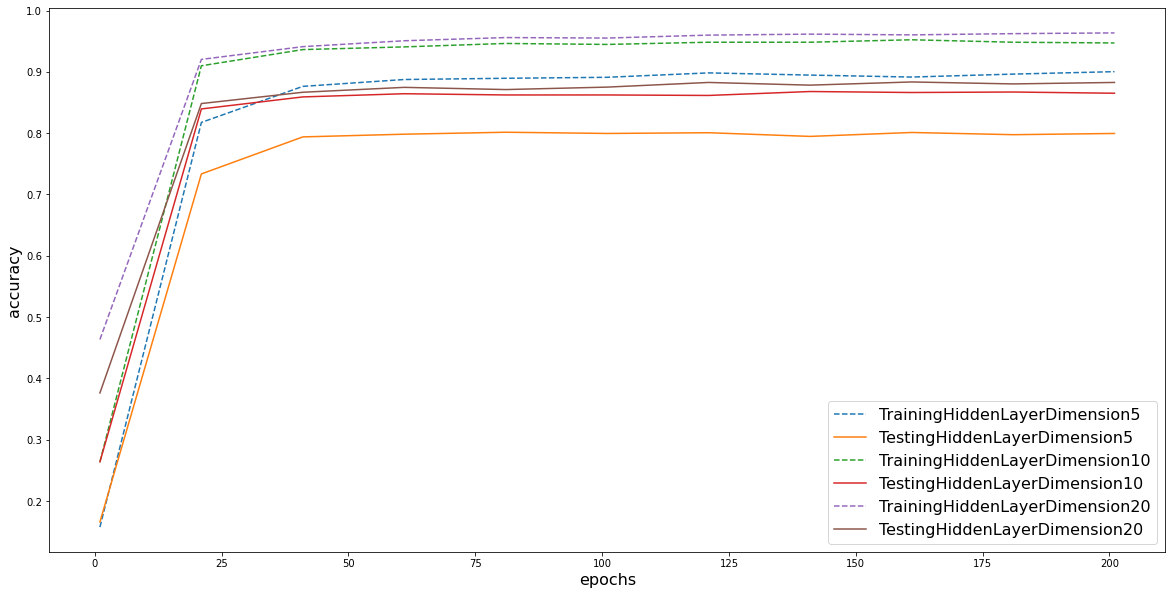

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
epochs_array = [i for i in range(1, 220, 20)]

# YOUR CODE HERE
#raise NotImplementedError()
trainAcc = []
for i in nns:
    trainAcc.append(i.acc_train_array)

testAcc = []
for i in nns:
    testAcc.append(i.acc_test_array)

# YOUR CODE HERE
#raise NotImplementedError()

HLD = [5, 10, 20]
lenArr = len(trainAcc)

for i in range(lenArr):
    plt.plot(epochs_array, trainAcc[i], label = "TrainingHiddenLayerDimension" + str(HLD[i]), ls='dashed')
    plt.plot(epochs_array, testAcc[i], label = "TestingHiddenLayerDimension" + str(HLD[i]))

ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.show()

Give your explanation below.

**(SOLUTION):**

We can clearly see that as our HLD (Hidden Layer Dimension) goes up, the performance of our Model also goes up, because when we increase HLD, we increase how many paramaters we learn which goes towards increasing the performance. This increases Variance and decreases Bias, and in turn as I mentioned, the model thus performs better as I've plotted above. $\checkmark$

**Extra Credit [10 points]:** Implement dropout by filling the `back_prop_dropout` function and update the `SGD_train` function to use it. Explain the impact of dropout on performance.

In [11]:
from tests import tests
tests.run_test_suite('prob 4', Network)

TestBackPropDropoutWithoutRegularization (tests.tests.TestNetwork) ... 

Epoch   20: Train    0.70000
Epoch   40: Train    0.47000


FAIL

FAIL: TestBackPropDropoutWithoutRegularization (tests.tests.TestNetwork)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\munta\Desktop\hw3\tests\tests.py", line 111, in TestBackPropDropoutWithoutRegularization
    self.assertAlmostEqual(nn_noreg.weights[0][0, 0], 2.98976038)
AssertionError: 1.2674950788220782 != 2.98976038 within 7 places (1.7222653011779216 difference)

----------------------------------------------------------------------
Ran 1 test in 1.960s

FAILED (failures=1)


AssertionError: one or more tests for prob 4 failed

In [12]:
hidden_layer_dimensions = 60
nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions], keep_prob=0.5)
nn.SGD_train(train, epochs=400, eta=0.1, lam=0, verbose=True, test=test)

Epoch    1: Train    0.19568, Test    0.18848
Epoch   20: Train    0.71989, Test    0.67907
Epoch   40: Train    0.81633, Test    0.76471
Epoch   60: Train    0.82993, Test    0.78391
Epoch   80: Train    0.83673, Test    0.78511
Epoch  100: Train    0.84594, Test    0.79152
Epoch  120: Train    0.84554, Test    0.79192
Epoch  140: Train    0.84754, Test    0.78912
Epoch  160: Train    0.85154, Test    0.79752
Epoch  180: Train    0.85274, Test    0.79632
Epoch  200: Train    0.85354, Test    0.79712
Epoch  220: Train    0.85474, Test    0.80152
Epoch  240: Train    0.85714, Test    0.80072
Epoch  260: Train    0.85794, Test    0.80112
Epoch  280: Train    0.85874, Test    0.80112
Epoch  300: Train    0.85954, Test    0.79992
Epoch  320: Train    0.86074, Test    0.80232
Epoch  340: Train    0.86074, Test    0.80272
Epoch  360: Train    0.86034, Test    0.80112
Epoch  380: Train    0.86074, Test    0.80152
Epoch  400: Train    0.86315, Test    0.80232


**(SOLUTION):**

Dropout actually decreases the training accuracy and the test accuracy as you can see above because the value that we have for dropout is actually a bit higher than it should be. If we had lower dropout values we would see our test accuracy go up and train accuracy go down. All of this is due to the way doing a dropout will regularize your Neural Network. I.e, the regularization on neural network makes some of the neurons we have into Null values and all the weights asociated with that particular neuron would beome zero. Due to this, we can infer that our variance will increase, and bias will decrease, and our model is going to do better in the testing phase than in the training. $\checkmark$

## [9 points] Problem 4 - Tensors and Autograd.
In this problem, we will demonstrate the benefits of PyTorch's Autograd mechanics by converting your implementation from Problem to utilize PyTorch Tensors. This problem is not meant to be difficult, rather it should be quite simple once you've done Problem 3.

Note that there are *better* ways to go about this which we will cover next. Here. we are keeping things as close to numpy as possible on purpose to show what's going on behind the scenes. Take a moment to look through our modifications to get an understanding of the differences. In the comments, we'll make notes of native torch functions that perform the same operations. 

Here, SGD is implemented manually to show you what's going on behind the scenes, but  usually you'd use [`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD). For future reference, the `weight_decay` parameter implements L2 normilazion. 

--- 

Before we move forward, let's cover a couple of points on notation. 

Just as it's best practice to do `import numpy as np`, PyTorch has best practices for imports as well:

```python
import torch 
import torch.nn as nn
import torch.nn.functional as F
```
You'll find that many of the functions you've been learning in NumPy have direct translations in PyTorch. The documentation can be found [here](https://pytorch.org/docs/stable/index.html) and is very user friendly, but we'll cover a few notable differences. 

- The numpy parameter `axis` becomes `dim` in PyTorch.
- Tensors have [view](https://pytorch.org/docs/stable/tensor_view.html) operations, which avoid copying data unnecasarily. Use these instead of `reshape()`. 
- Using `torch.from_numpy()` also avoids copying data stored in `numpy` arrays.
- Numpy interprets `np.dot()` of 2D matrices as matrix multiplication. Pytorch does not have this behaviour, see instead [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)
- PyTorch uses trailing underscores such as `torch.add_()` to denote in-place operations. As an example, the following operations are equivilent:
```python
x = x + y
x = torch.add(x, y)
x.add_(y)
```
You're likely to see these operations when randomly initializing Tensors, or filling a tensor with zeros:
```python
torch.nn.init.uniform_(x)
x.zero_()
```

---
Now onto the problem, your tasks are as follows:

1. Modify `forward_prop` to work on PyTorch Tensors.
2. Modify `SGD_step` to work on PyTorch Tensors. This is easier than it sounds, since with PyTorch we don't have to worry about calculating gradients manually.

**SOURCES USED:**

1 - (Torch MatMul) https://pytorch.org/docs/stable/generated/torch.matmul.html

In [13]:
import torch


class TorchNetwork(Network):
    def __init__(self, sizes, keep_prob=-1):
        super().__init__(sizes, keep_prob)
        
        # Convert your weights and biases to Tensors.
        # The flag requires_grad=True tells PyTorch to track gradients for us. 
        self.biases = [torch.tensor(b, requires_grad=True) for b in self.biases]
        self.weights = [torch.tensor(w, requires_grad=True) for w in self.weights]
        

    def g(self, z):
        """ Activation function
            Could also use torch.sigmoid(z)
        """
        return sigmoid_torch(z) 

    def forward_prop(self, a):
        """ Memory aware forward propagation. 
            Now this is for both training and testing.
        
        """
        # TODO: Convert your forward_prop function from part a to work on Tensors. 
        # YOUR CODE HERE
        #raise NotImplementedError()
        rangeVal = (self.L - 1)
        for i in range(rangeVal):
            #Use Pytorch's Matrix Multiplication feature.
            zVal = torch.matmul(self.weights[i], a) + self.biases[i]
            a = self.g(zVal)
        return a

    def cost(self, a, y):
        """ Cost function, same as F.mse_loss()
        """
        return ((a - y)**2).mean() 
            

    def SGD_step(self, x, y, eta, lam):
        """
            Performs a single step of SGD on weights and biases

        Args:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.
                
        """
        
        # Zero out the old gradients if they exist. 
        # Would be optim.zero_grad() if we were using an optimizer.
        for p in (*self.weights, *self.biases):
            if p.grad is not None:
                p.grad.detach_()
                p.grad.zero_()
            
        # TODO: 
        # (1) call forward_prop to get a. 
        # (2) Calucate loss using the cost function.
        # (3) Use loss.backward() to to perform backpropagation automatically.

        # YOUR CODE HERE
        #raise NotImplementedError()
        #Call Forward Prop to get a
        aVal = self.forward_prop(x)
        #Calculate Loss using Cost Function
        lossVal = self.cost(aVal, y)
        #Using Loss.Backward
        lossVal.backward()

        # Perform sgd update 
        # Would be optimizer.step()
        with torch.no_grad():
            # l2 regularization on weights only.
            for p in self.weights:
                p.grad.add_(p, alpha=lam)
            # sgd update. 
            for p in (*self.weights, *self.biases):
                p.add_(p.grad, alpha=-eta)
                

def sigmoid_torch(z, threshold=20):
    """ Same as sigmoid before, now with torch.clamp() instead of np.clip().
        We could also just use torch.sigmoid().
    """
    z = torch.clamp(z, -threshold, threshold)
    return 1.0 / (1.0 + torch.exp(-z))


**Part 5 [10 points]:** Implement `SGD_step` and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [14]:
from tests import tests
tests.run_test_suite('prob 5', TorchNetwork)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.760s

OK


[23 Points] Problem 5 - Implement RNN Network to classify whether text is spam or ham 
---

Dataset is obtained from UCI Machine Learning repository consisting of SMS tagged messages (labelled as either **ham** (legitimate) or **spam**) that have been collected for SMS Spam research.

We will now use [PyTorch](https://pytorch.org/docs/stable/index.html) (Pytorch Lightning to be precise) to implement a classifier. Update the snippet below to build a model with an embedding layer, and an LSTM layer, and a dense layer. This question allows you to get familiar with popular deep learning toolkits and the solution only has a few lines. In practice, there is no need to reinvent the wheels.


Learn more about RNN : https://colah.github.io/posts/2015-08-Understanding-LSTMs/

**Note**: You need to install Tensorflow for this problem (CPU version if you do not have a nvidia GPU). You can find installation instructions [here](https://www.tensorflow.org/install)

If you are using Anaconda, install the CPU version by doing 
``` the end of the sequence, called pre- or post-sequence padding, can be specified by the “padding” argument, as follows.
Pre-Sequence Padding

Pre-sequence padding is the default (padding=’pre’)
conda install 'tensorflow=*=mkl*'
```

The following class converts textual data to sequences of numbers. Initially, we create a vocabulary of words such that each word is associated with a particular number. Then, for each new sentence, each word is replaced by its corresponding encoding.

For example, if we had an encoding : "I" : 1, "am" : 5, "alive"  : 9
Then the sentence "I am alive" would be represented as [1, 5, 9]

Now, since sentences can be of varying lengths and inputs to neural networks are fixed in size, we the input size to our model to be lager than the largest sentence and pad smaller sentences with 0's.

In [15]:
import multiprocessing as mp
import pickle
import pandas as pd
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.nn.functional as F

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from torch.utils.data import DataLoader, TensorDataset

import pytorch_lightning as pl
from pytorch_lightning.loggers import CSVLogger

class SpamHam(pl.LightningDataModule):
    """ A datamodule for the RNN. You shouldn't have to modify this class."""
    def __init__(self, dict_size=5000, example_length=150, batch_size=128):
        super().__init__()

        self.dict_size = dict_size
        self.batch_size = batch_size
        self.example_length = example_length

        # preprocess training data
        self.tok = Tokenizer(num_words=dict_size)

    def load_data(self, location):
        return pickle.load(open(location, 'rb'))

    def make_dataset(self, x, y, tok=None):
        # tokenize
        sequences = self.tok.texts_to_sequences(x)
        x = sequence.pad_sequences(sequences, maxlen=self.example_length)

        # make torch arrays.
        x = torch.from_numpy(x).to(torch.int64)
        y = torch.from_numpy(y).to(torch.float32)

        return TensorDataset(x, y)

    def setup(self, stage):
        # load data
        train_x, test_x, train_y, test_y = self.load_data('./data/spam_data.pkl')
        
        # fit tokenizer
        self.tok.fit_on_texts(train_x)        
        
        # make datasets
        self.train = self.make_dataset(train_x, train_y)
        self.test = self.make_dataset(test_x, test_y)

    def train_dataloader(self):
        return DataLoader(self.train, batch_size=self.batch_size, shuffle=True,
                          num_workers=mp.cpu_count() // 4)

    def test_dataloader(self):
        return DataLoader(self.test, batch_size=self.batch_size, shuffle=False,
                          num_workers=mp.cpu_count() // 4)

### Part 1 [15 points]
PyTorch Lightning expects your model to follow a standard class template. Once certain functions are completed, pl.Trainer() allows you train the model without explicitly writing a training loop. In the following example, you need to define the model and how the input is propagated through the model (called the forward pass) and then create the training and test steps.

Complete the functions `init`, `training_step`, and `test_step` and `forward`functions. 

**SOURCES USED:**

1 - (PyTorch Embedding) https://stackoverflow.com/questions/50747947/embedding-in-pytorch

2 - (LSTM PyTorch) https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

3 - (Linear in PyTorch) https://hackernoon.com/visualizing-linear-regression-with-pytorch-9261f49edb09

In [16]:
class RNN(pl.LightningModule):
    """ RNN classifier """

    def __init__(self, embedding_length=32, dict_size=5000, example_length=150):
        """
        initialize RNN model
        :param embedding_length: size of word embedding
        """
        super().__init__()

        # To complete this function, you will need PyTorch's Embedding, LSTM and linear layers.
        
        # The embedding layer simply creates a dictionary between words in your vocabulary and their vector 
        # representations. Therefore, each word has a unique representation.
        # For instance, say your input x is encoded as [1, 5, 9] and embedding_dim = 32 (see documentation for 
        # arguments to this layer), then after passing through the embedding layer the output will be 
        # of shape 3x32
        
        # Documentation for LSTM layer in :
        #     https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM
        
        # Note there are multiple ways to define your model, 
        # we suggest adding individual layers here, but any method is fine.
        
        # As an example, you could define a linear layer with n inputs and m outputs like so:
        # self.linear = nn.Linear(n, m)
        
        # Similarly, define the three layers needed for your model
        
        # TODO: build model by defining individual layers in the network
            
        # YOUR CODE HERE
        #raise NotImplementedError()
        self.embedding = nn.Embedding(dict_size, embedding_length)
        #I played around with a few hidden_size variables. If I make it bigger, it actually would start to decrease accuracy if HLD too big.
        #64 was a nice even number value that I tried out.
        self.lstm = nn.LSTM(input_size = embedding_length, hidden_size = 64, num_layers = 1, batch_first = True)
        self.linear = nn.Linear(64, 1)
        #y_hat, the output of training func has a dimension of (128 x 150 x 1).
        #y has a dimension of 128.
        self.example_input_array = torch.zeros([1, 150], dtype=torch.int64)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def forward(self, x):
        """
        
        Pytorch allows you to stack layers on top of each other very easily.
        
        For example, if we have layers self.layer1 and self.layer2 acting on input x, we can do
        out_1 = self.layer1(x)
        out_2 = self.layer2(out_1)
        This would constitute a forward pass for the above hypothetical network.
        
        Your job in this function is to propagate the input x through the network you defined in __init__()
        
        TODO:
        1. Pass input though embedding layer
        2. Propagate output of previous step through LSTM
        3. Pass final output of LSTM through linear layer
        4. Apply Sigmoid activation (torch.sigmoid()) to output of step 3 to obtain probabilities
        """
        
        # YOUR CODE HERE
        #raise NotImplementedError()
        e_tensor = self.embedding(x)
        var = None
        #Pass in the embedded value and None so we can get the output
        outVal, (p1, p2) = self.lstm(e_tensor, var)
        #print(outVal)
        #print(outVal[:1])
        #Splice up the outValue to get the value we need
        outVal = outVal[:, -1, :]
        o1 = self.linear(outVal)
        
        #Update out and use the torch sigmoid on o1
        out = torch.sigmoid(o1)
        return out

    def accuracy(self, y_hat, y):
        return (y == y_hat.round()).to(torch.float32).mean()

    def training_step(self, batch, batch_idx):
        """ Perfom a training step. 
        
        This is just one step on one batch during training (no looping required) 
        
        TODO:
            - forward pass on data in batch
            - compute training loss (use PyTorch's F.binary_cross_entropy since this is binary classification)
            - Compute training accuracy (using the self.accuracy function)
        """
        
        # YOUR CODE HERE
        #raise NotImplementedError()
        #As was mentioned on piazza...
        #(x, y) = batch splits batch up into x and y by x = batch[0:-2] y = batch[-1] (I think)
        #The last index of batch contains the truth values for the other inputs.
        (x, y) = batch
        #Then you take x and put it through forward
        forward = self.forward(x)
        #As mentioned in the instructions, use cross entropy
        loss = F.binary_cross_entropy(forward, y)
        
        #Finally, calculate accuracy on the forward pass and y
        acc = self.accuracy(forward, y)
        # We implemented logging for you. 
        result = pl.TrainResult(loss)
        result.log('train_loss', loss)
        result.log('train_accuracy', acc, prog_bar=True)
        return result

    def test_step(self, batch, batch_idx):
        """ Perfom a test step 
            hint: your code should be the same as your train step
        
        TODO:
            - forward pass on data in batch
            - compute test loss 
            - Compute test accuracy  
        """
        
        # YOUR CODE HERE
        #raise NotImplementedError()
        #As was mentioned on piazza...
        #(x, y) = batch splits batch up into x and y by x = batch[0:-2] y = batch[-1] (I think)
        #The last index of batch contains the truth values for the other inputs.
        (x, y) = batch
        #Then you take x and put it through forward
        forward = self.forward(x)
        #As mentioned in the instructions, use cross entropy
        loss = F.binary_cross_entropy(forward, y)
        
        #Finally, calculate accuracy on the forward pass and y
        acc = self.accuracy(forward, y)
        # We implemented logging for you. 
        result = pl.EvalResult(loss)
        result.log('test_loss', loss, prog_bar=True)
        result.log('test_acc', acc, prog_bar=True)
        return result

In [17]:
# Define your data 
spam_ham_dm = SpamHam()

def run_rnn(**kwargs):
    # helper function for running RNN.
    logger = CSVLogger("logs", name="rnn")
    trainer = pl.Trainer(
        gpus=int(torch.cuda.is_available()),
        logger=logger,
        min_epochs=5,
        max_epochs=5,
        row_log_interval=1,
        log_save_interval=1,
        deterministic=True
    )
    
    model = RNN(**kwargs)
    trainer.fit(model, spam_ham_dm)
    results = trainer.test(verbose=False)
    return results, logger.experiment.metrics_file_path

results, _ = run_rnn()
print('Accuracy for LSTM: ', results[0]['test_acc'])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type      | Params | In sizes            | Out sizes                               
---------------------------------------------------------------------------------------------------------
0 | embedding | Embedding | 160 K  | [1, 150]            | [1, 150, 32]                            
1 | lstm      | LSTM      | 25 K   | [[1, 150, 32], '?'] | [[1, 150, 64], [[1, 1, 64], [1, 1, 64]]]
2 | linear    | Linear    | 65     | [1, 64]             | [1, 1]                                  


Epoch 4: 100%|██████████| 37/37 [00:12<00:00,  3.03it/s, loss=0.112, v_num=23, train_accuracy=0.969]

Saving latest checkpoint..


Testing: 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]
Accuracy for LSTM:  0.972229540348053


**(SOLUTION):**

After completing the functions, I am able to run my LSTM and it gets an overall accuracy of about $0.97$ so that's not bad at all! $\checkmark$

### Part 2 [8 points]
* Change the embedding length and experiment with these values: [8, 16, 32, 48, 64].
* Plot training accuracies of different embedding lengths vs. epochs.
* Observe and explain the impact of embedding length in LSTM Model.

In [18]:
mfiles = []
test_accuracy_array = []

for embedding_len in [8, 16, 32, 48, 64]:    
    results, metrics = run_rnn(embedding_length=embedding_len)
    print('Accuracy for LSTM: ', results[0]['test_acc'])
    mfiles.append(metrics)

train_accuracy_matrix = np.array(
    [pd.read_csv(f)["train_accuracy"].values for f in mfiles])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type      | Params | In sizes           | Out sizes                               
--------------------------------------------------------------------------------------------------------
0 | embedding | Embedding | 40 K   | [1, 150]           | [1, 150, 8]                             
1 | lstm      | LSTM      | 18 K   | [[1, 150, 8], '?'] | [[1, 150, 64], [[1, 1, 64], [1, 1, 64]]]
2 | linear    | Linear    | 65     | [1, 64]            | [1, 1]                                  


Epoch 4: 100%|██████████| 37/37 [00:16<00:00,  2.29it/s, loss=0.245, v_num=24, train_accuracy=0.883]

Saving latest checkpoint..


Testing: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type      | Params | In sizes            | Out sizes                               
---------------------------------------------------------------------------------------------------------
0 | embedding | Embedding | 80 K   | [1, 150]            | [1, 150, 16]                            
1 | lstm      | LSTM      | 20 K   | [[1, 150, 16], '?'] | [[1, 150, 64], [[1, 1, 64], [1, 1, 64]]]
2 | linear    | Linear    | 65     | [1, 64]             | [1, 1]                                  



Accuracy for LSTM:  0.9191833138465881
Epoch 4: 100%|██████████| 37/37 [00:13<00:00,  2.69it/s, loss=0.119, v_num=25, train_accuracy=0.953]

Saving latest checkpoint..


Testing: 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type      | Params | In sizes            | Out sizes                               
---------------------------------------------------------------------------------------------------------
0 | embedding | Embedding | 160 K  | [1, 150]            | [1, 150, 32]                            
1 | lstm      | LSTM      | 25 K   | [[1, 150, 32], '?'] | [[1, 150, 64], [[1, 1, 64], [1, 1, 64]]]
2 | linear    | Linear    | 65     | [1, 64]             | [1, 1]                                  



Accuracy for LSTM:  0.9654017686843872
Epoch 4: 100%|██████████| 37/37 [00:14<00:00,  2.59it/s, loss=0.120, v_num=26, train_accuracy=0.953]

Saving latest checkpoint..


Testing: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type      | Params | In sizes            | Out sizes                               
---------------------------------------------------------------------------------------------------------
0 | embedding | Embedding | 240 K  | [1, 150]            | [1, 150, 48]                            
1 | lstm      | LSTM      | 29 K   | [[1, 150, 48], '?'] | [[1, 150, 64], [[1, 1, 64], [1, 1, 64]]]
2 | linear    | Linear    | 65     | [1, 64]             | [1, 1]                                  



Accuracy for LSTM:  0.9765625
Epoch 4: 100%|██████████| 37/37 [00:14<00:00,  2.56it/s, loss=0.091, v_num=27, train_accuracy=0.961]

Saving latest checkpoint..


Testing: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type      | Params | In sizes            | Out sizes                               
---------------------------------------------------------------------------------------------------------
0 | embedding | Embedding | 320 K  | [1, 150]            | [1, 150, 64]                            
1 | lstm      | LSTM      | 33 K   | [[1, 150, 64], '?'] | [[1, 150, 64], [[1, 1, 64], [1, 1, 64]]]
2 | linear    | Linear    | 65     | [1, 64]             | [1, 1]                                  



Accuracy for LSTM:  0.9789260029792786
Epoch 4: 100%|██████████| 37/37 [00:14<00:00,  2.61it/s, loss=0.085, v_num=28, train_accuracy=0.984]

Saving latest checkpoint..


Testing: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]
Accuracy for LSTM:  0.984375


Plot training results below.

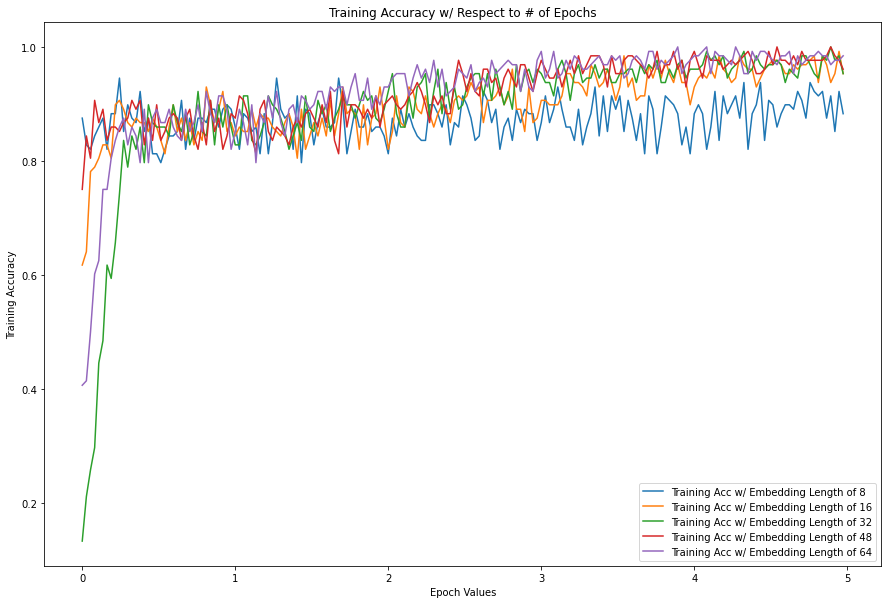

In [19]:
#Shape must be 186.
x = np.linspace(0, 5, 186)
#Get our embedding array
embedding_len = [8, 16, 32, 48, 64]
#Plot the figure below
fig, ax = plt.subplots(figsize = (15, 10))
checker = 0
#Now let's plot up our training data.
for i in train_accuracy_matrix:
    ax.plot(x, i, label = "Training Acc w/ Embedding Length of {}".format(embedding_len[checker]))
    checker = checker + 1
ax.set_xlabel("Epoch Values")
ax.set_ylabel("Training Accuracy")
ax.set_title("Training Accuracy w/ Respect to # of Epochs")
ax.legend()

Give your observation and explanation below.

**(SOLUTION):**

We can see from the plot above that as you increase your Embedding Length, the performance of our model also increases, because our embedding layer helps to actually increase how much information is being learned by the model (It's a more dense or thorough representation). So given that we are learning more via the increasing embedding layers, our performance does increase as you can see by the graph. $\checkmark$

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://forms.gle/6Kf72C26am1SAjtg6) to solicit your feedback for how to improve the course.